In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
palette = sns.color_palette("Paired") + sns.color_palette("husl", 8)
palette = palette[1::2] + palette[::2]

sns.set(font_scale=1, style="ticks", context="paper", palette=palette)
plt.style.use('fig.yaml')

In [3]:
alexnet_mapping = {
    "features.0": "conv1",
    "features.3": "conv2",
    "features.6": "conv3",
    "features.8": "conv4",
    "features.10": "conv5"
}

vgg16_mapping = {'features.0': 'conv1-1',
 'features.2': 'conv1-2',
 'features.5': 'conv2-1',
 'features.7': 'conv2-2',
 'features.10': 'conv3-1',
 'features.12': 'conv3-2',
 'features.14': 'conv3-3',
 'features.17': 'conv4-1',
 'features.19': 'conv4-2',
 'features.21': 'conv4-3',
 'features.24': 'conv5-1',
 'features.26': 'conv5-2',
 'features.28': 'conv5-3',
}

In [4]:
def plot(x, means, stds, mapping, labels, save_path=None):
    fig, ax = plt.subplots()

    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

    for i, (mean, std) in enumerate(zip(means, stds)):
        name = mean[0]
        ax.errorbar(x, mean[1], yerr=std[1], linewidth=0.5, markersize=2, fmt='-o', label=mapping[name], capsize=1, zorder = len(mapping) / (i+1))
        ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#         ax.set_ylim(0, 1)
#         ax.set_xlim(0, 1)
        ax.tick_params(axis='both', which='major', labelsize=7.25)

        ax.set_title(labels["title"], weight="bold")
        ax.set_xlabel(labels["x"])
        ax.set_ylabel(labels["y"])

    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    ax.legend(handles, labels, bbox_to_anchor=(1.04,0.5), loc="center left", numpoints=1)
    
    if save_path:
        plt.savefig(save_path)

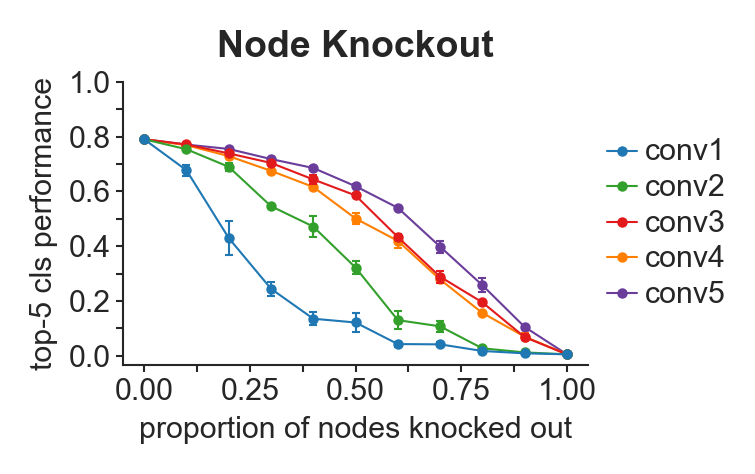

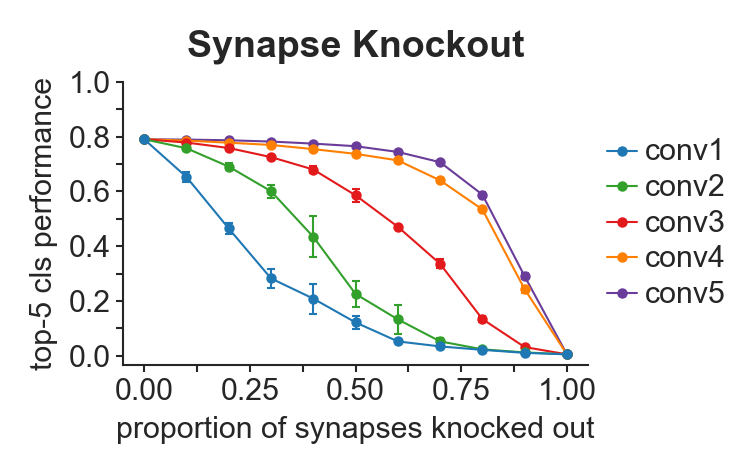

In [5]:
# alexnet imagenet robustness data
data = pd.read_csv("../data/perturbation-experiments/alexnet-imagenet.csv")
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.columns = data.columns.str.replace(' ', '')

# alexnet node knockout
labels = {
    "title": "Node Knockout",
    "x": "proportion of nodes knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "node"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(alexnet_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(alexnet_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

plot(xs, means, stds, alexnet_mapping, labels, save_path = "alexnet_imagenet_node_knockout.pdf")

# alexnet synapse knockout
labels = {
    "title": "Synapse Knockout",
    "x": "proportion of synapses knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "synapse"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(alexnet_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(alexnet_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

plot(xs, means, stds, alexnet_mapping, labels, save_path = "alexnet_imagenet_synapse_knockout.pdf")

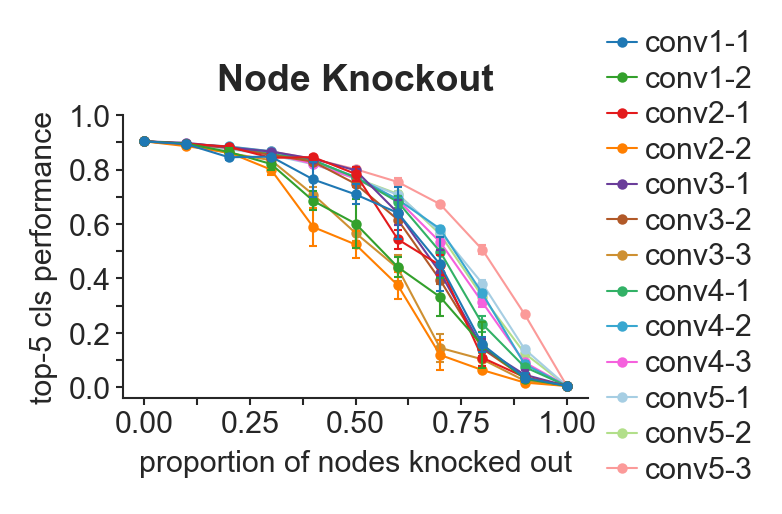

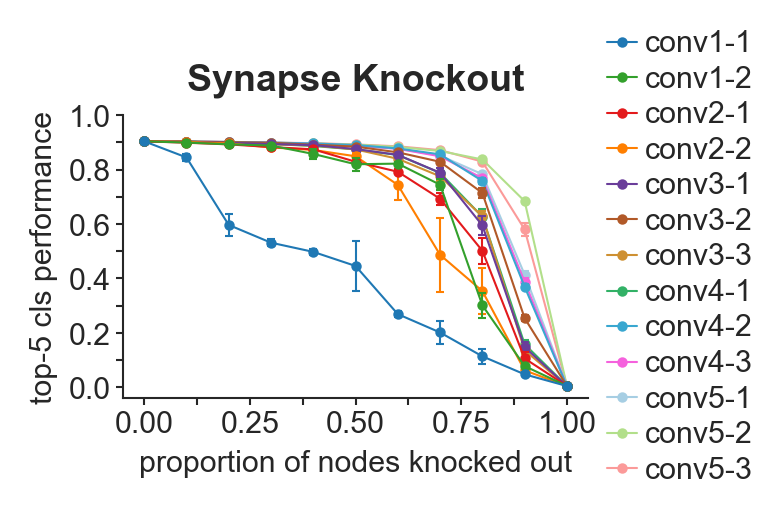

In [6]:
# vgg16 imagenet robustness data
data = pd.read_csv("../data/perturbation-experiments/vgg16-imagenet.csv")
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.columns = data.columns.str.replace(' ', '')

# vgg16 node knockout
labels = {
    "title": "Node Knockout",
    "x": "proportion of nodes knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "node"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(vgg16_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(vgg16_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

plot(xs, means, stds, vgg16_mapping, labels, save_path = "vgg16_imagenet_node_knockout.pdf")

# alexnet vgg16 knockout
labels = {
    "title": "Synapse Knockout",
    "x": "proportion of nodes knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "synapse"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(vgg16_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(vgg16_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

plot(xs, means, stds, vgg16_mapping, labels, save_path = "vgg16_imagenet_synapse_knockout.pdf")

In [7]:
# alexnet cifar100 robustness data
# data = pd.read_csv("../data/perturbation-experiments/20211110_105315-experiments.csv")
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.columns = data.columns.str.replace(' ', '')

# alexnet node knockout
labels = {
    "title": "Node Knockout",
    "x": "proportion of nodes knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "node"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(alexnet_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(alexnet_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

# plot(xs, means, stds, alexnet_mapping, labels, save_path = "alexnet_node_knockout.pdf")

# alexnet synapse knockout
labels = {
    "title": "Synapse Knockout",
    "x": "proportion of synapses knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "synapse"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(alexnet_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(alexnet_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

# plot(xs, means, stds, alexnet_mapping, labels, save_path = "alexnet_synapse_knockout.pdf")